# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls drive/'My Drive'/data/train_data.csv

'drive/My Drive/data/train_data.csv'


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


from collections import Counter

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('drive/My Drive/data/train_data.csv')
resource_data = pd.read_csv('drive/My Drive/data/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print('The Columns with their nan values counts are below ')
for col in project_data.columns:
    print('{col} '.format(col=col),project_data[col].isnull().sum())

The Columns with their nan values counts are below 
Unnamed: 0  0
id  0
teacher_id  0
teacher_prefix  3
school_state  0
project_submitted_datetime  0
project_grade_category  0
project_subject_categories  0
project_subject_subcategories  0
project_title  0
project_essay_1  0
project_essay_2  0
project_essay_3  105490
project_essay_4  105490
project_resource_summary  0
teacher_number_of_previously_posted_projects  0
project_is_approved  0


In [0]:
# removing 3 nan values from teacher prefix column as they seems to be outliers
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
project_data.dropna(subset=['teacher_prefix'],inplace=True)

In [6]:
#how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True) #0 for index and 1 for columns

#counting the occurence of word

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [9]:
# checking the items present category list
cat_dict.items()

dict_items([('Math_Science', 41419), ('SpecialNeeds', 13642), ('Literacy_Language', 52236), ('AppliedLearning', 12135), ('History_Civics', 5914), ('Music_Arts', 10293), ('Health_Sports', 14223), ('Warmth', 1388), ('Care_Hunger', 1388)])

## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.\r\nWe all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.\r\n       Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will al

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.  We all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.         Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will allow 

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Some of my students come from difficult family lives but they do not let that stop them We have built a community in our classroom that allows each student to be comfortable with who they are Even though we are a diverse school everyone feels included We have a high Hispanic population and about 90 of the students are on free or reduced price lunch Most students are living with a single parent or both parents work full time although many parents are eager to help in any way they can We all know how important it is to get kids up and moving I want my classroom to be a place where students can be active phyically and mentally The requested items will allow my students to move all day When they are sitting in a chair their movement is limited Kindergarten students have a hard time sitting still for long periods of time They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair Having these choices in my classroom will allow students to be active and 

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109245/109245 [00:57<00:00, 1911.27it/s]


In [20]:
# after preprocesing
preprocessed_essays[20000]

'students come difficult family lives not let stop built community classroom allows student comfortable even though diverse school everyone feels included high hispanic population 90 students free reduced price lunch students living single parent parents work full time although many parents eager help way know important get kids moving want classroom place students active phyically mentally requested items allow students move day sitting chair movement limited kindergarten students hard time sitting still long periods time would much rather bounce stability ball wiggle cushion sit hard chair choices classroom allow students active learn time choices classroom also build greater bond students learn choose seat best fits learning style hopefully able help classmates find seat works students move around room able work everyone instead one group day nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
# similarly you can preprocess the titles also
preprocessed_title = []

for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r',' ')
    sent = sent.replace('\\"',' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 109245/109245 [00:02<00:00, 41575.08it/s]


<h2><font color='red'> 1.5 Preprocessing of `Teacher Prefix`</font></h2>
As the teacher prefix has period assciated with the title like mr.,dr.,etc.


In [22]:
# let's check the distribution of this prefix with having period and  special characters
# https://www.geeksforgeeks.org/python-program-check-string-contains-special-character/
import re
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:.]')
project_data.teacher_prefix.map(lambda x: regex.search(x)== None).value_counts()

False    106885
True       2360
Name: teacher_prefix, dtype: int64

There 106885 prefix having period at the end and 2360 titles won't have period. This can be lead to lead to vectorization problem as mr. and mr will be considered differently for features vector.

In [0]:
# https://stackoverflow.com/questions/50444346/fast-punctuation-removal-with-pandas
# cleaning the teacher prefix columns as the cells have periods associated with the value like dr.,mr.,etc
# python's str.translate function is implemented in C, and is therefore very fast.

def clean_col(col): 
    import string
    punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'   # `|` is not present in teacher prefx
    transtab = str.maketrans(dict.fromkeys(punct, ''))

    col = '|'.join(col.tolist()).translate(transtab).split('|')
    return col

In [0]:
preprocessed_prefix = clean_col(project_data['teacher_prefix'])


In [25]:
# verifying if any special char are present or not
c = list(map(lambda x : regex.search(x) == None,preprocessed_prefix)).count(True)
print(c)

109245


No special character is present as we have 109245 number of data where all returning true to above regex means all values are special character free.

## 1.6 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Assignment 4: Apply Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Naive Bayes</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

#### Pandas Dataframe Reordering

Reordering the pandas dataframe with pre processed essays,title and relevant columns for classification

In [27]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [0]:
# checking the aggregate price per resource
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [30]:
# https://stackoverflow.com/questions/45747589/copying-a-column-from-one-dataframe-to-another-gives-nan-values?rq=1

project_data_ = pd.DataFrame({c: project_data[c].to_numpy() for c in ('school_state','project_grade_category','clean_categories','clean_subcategories',\
                                                                     'teacher_number_of_previously_posted_projects','price')})
project_data_.head(3)



,school_state,project_grade_category,clean_categories,clean_subcategories,teacher_number_of_previously_posted_projects,price
0,CA,Grades PreK-2,Math_Science,AppliedSciences Health_LifeScience,53,725.05
1,UT,Grades 3-5,SpecialNeeds,SpecialNeeds,4,213.03
2,CA,Grades PreK-2,Literacy_Language,Literacy,10,329.00


In [31]:
# assigning the text data to existing dataframe
project_data_ = project_data_.assign(teacher_prefix = preprocessed_prefix,\
                                     essay = preprocessed_essays,title = preprocessed_title,approved = project_data['project_is_approved'])
project_data_.head(3)


,school_state,project_grade_category,clean_categories,clean_subcategories,teacher_number_of_previously_posted_projects,price,teacher_prefix,essay,title,approved
0,CA,Grades PreK-2,Math_Science,AppliedSciences Health_LifeScience,53,725.05,Mrs,fortunate enough use fairy tale stem kits clas...,engineering steam primary classroom,1
1,UT,Grades 3-5,SpecialNeeds,SpecialNeeds,4,213.03,Ms,imagine 8 9 years old third grade classroom se...,sensory tools focus,1
2,CA,Grades PreK-2,Literacy_Language,Literacy,10,329.00,Mrs,class 24 students comes diverse learners stude...,mobile learning mobile listening center,1


#### Creating the dataframe for new features first.

In [32]:
# Before splitting model let's check if dataset is balanced or not.
print("Negative reviews count = ",np.sum(project_data_.approved==0))
print("positive reviews count = ",np.sum(project_data_.approved==1))

Negative reviews count =  16542
positive reviews count =  92703


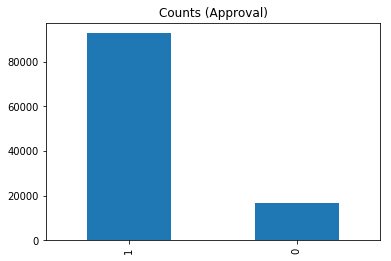

In [33]:
# vizualing the distribution of class attribute
project_data_.approved.value_counts().plot(kind='bar',title='Counts (Approval)')

As we can clearly see that this dataset higly imbalanced towards positive reviews that means most of the posted projects are getting accepted on this platform.

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = None,None,None,None # clearing the variables
# splitting of train and test data with 80:20 ratio

x_train,x_test,y_train,y_test = train_test_split(project_data_.iloc[:,:project_data_.shape[1]-1],project_data_.approved,test_size=.2,stratify=project_data_.approved)
#X_train,X_cv,y_train,y_cv = train_test_split(X_traincv,y_traincv,test_size=.2,stratify=y_traincv)
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=.2,stratify=y_train)


print("Train Data shape : ",x_train.shape, y_train.shape)
print("Cross Validation Data shape :", x_cv.shape, y_cv.shape)
print("Test Data shape :", x_test.shape, y_test.shape)

print("="*100)


Train Data shape :  (69916, 9) (69916,)
Cross Validation Data shape : (17480, 9) (17480,)
Test Data shape : (21849, 9) (21849,)


In [35]:
# Count of positive and negative class label in training, cross validation and test data

print("x train distribution = \n", y_train.value_counts())
print("x cv distribution = \n", y_cv.value_counts())
print("x test distribution = \n", y_test.value_counts())

x train distribution = 
 1    59329
0    10587
Name: approved, dtype: int64
x cv distribution = 
 1    14833
0     2647
Name: approved, dtype: int64
x test distribution = 
 1    18541
0     3308
Name: approved, dtype: int64


In [36]:
x_train.head(3)

,school_state,project_grade_category,clean_categories,clean_subcategories,teacher_number_of_previously_posted_projects,price,teacher_prefix,essay,title
32328,MA,Grades 3-5,Literacy_Language,ESL Literacy,0,1003.00,Mrs,students students interrupted formal education...,mrs tritto students crave technology
61832,TX,Grades 6-8,AppliedLearning,College_CareerPrep Other,0,516.32,Mrs,work fun energetic students dire need assistan...,engaged learning technology
57559,OH,Grades 3-5,Math_Science History_Civics,AppliedSciences History_Geography,14,294.10,Mrs,child learn way teach maybe teach way learn ig...,ithink ican success ipad


## **Functions Declaration:**

Declaration of functions for which is further used in computational process like 
* Vectorization
* Hyperparamater Tuning
* Model Generalisation score on Test Data 
* Printing Dimenionality info of input matrix list
* Retrive the vocabulary words for vectorization purposes

In [0]:

def retreive_vocab(_data=None):
    ls = []
    for word in _data:
        if len(word) != 1:
            for w in word.split():
                ls.append(w)
        else:
            ls.append(word)
    return list(set(ls))

In [0]:
# Defining a function to compute BOW, TFIDF 

def vectorize_text(encoding_type=None,**kwargs):
    # Validation for proper argument names
    try:
        checklist = ['test_text','cv_text','train_text']
        for k,v in kwargs.items():
            if k in checklist:
                checklist.remove(k)
        if not checklist:
            # do nothing
            pass
        else:
            raise ValueError("You haven't passed the matrices in the described format, please use names as test_text,cv_text,train_text")
    except ValueError as e:
        print("Error : ", e)
            
    text_train = kwargs['train_text']
    text_cv = kwargs['cv_text']
    text_test = kwargs['test_text']
    
    if "BOW" in encoding_type.upper():
        #Compute BOW
        # We are considering only the words which appeared in at least 10 documents(rows or projects).
        vectorizer = CountVectorizer(min_df=10,max_features=3000)
        vectorizer.fit(text_train)
        
        return vectorizer.transform(text_train),vectorizer.transform(text_cv),vectorizer.transform(text_test),vectorizer.get_feature_names()
    
    elif "TFIDF" in encoding_type.upper():
        #Compute TFIDF
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(min_df=10,max_features=3000)
        vectorizer.fit(text_train)
        return vectorizer.transform(text_train),vectorizer.transform(text_cv),vectorizer.transform(text_test),vectorizer.get_feature_names()
    
    
    else:
        raise ValueError('Please give the encoding type from the following: BOW, TFIDF, AVGW2V,TFIDFW2V')
        
        

In [0]:
def _hypertuning(x_train=None,y_train=None,x_cv=None,y_cv=None,tune_type=None):
    _alpha = [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
    from sklearn.naive_bayes import MultinomialNB
    
    if tune_type.lower() == 'custom':

        from sklearn.metrics import roc_auc_score

        #y_train_pred = []
        train_auc_score = []
        cv_auc_score = []
        e
        for i in _alpha:
            y_train_pred = []
            y_cv_pred = []
            clf = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
            clf.fit(x_train,y_train)

        # return value of predict_proba : array of shape = [n_samples, n_classes], or a list of n_outputs
        # since the value of probabilities obtained will be much less, let's consider the log probabilities
            y_train_pred.extend(clf.predict_log_proba(x_train)[:,1])
            y_cv_pred.extend(clf.predict_log_proba(x_cv)[:,1])
            #import pdb
            #pdb.set_trace()
            train_auc_score.append(roc_auc_score(y_train,y_train_pred))
            cv_auc_score.append(roc_auc_score(y_cv,y_cv_pred))


        plt.plot(np.log(_alpha), train_auc_score, label='Train AUC')
        plt.scatter(np.log(_alpha),train_auc_score)
        plt.plot(np.log(_alpha), cv_auc_score, label='CV AUC')
        plt.scatter(np.log(_alpha),cv_auc_score)
        plt.legend()
        plt.xlabel("log alpha: hyperparameter")
        plt.ylabel("AUC")
        plt.title("ERROR PLOTS")
        plt.show()

        

    elif tune_type.lower() == 'gridsearch':

        # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
        from sklearn.model_selection import GridSearchCV

        nb_clf = MultinomialNB(class_prior=[0.5,0.5])
        parameters = {'alpha' :[0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]}
        clf = GridSearchCV(nb_clf, parameters, cv=10, scoring='roc_auc',n_jobs=4,return_train_score=True) #cv param is K in K-Fold cross validation
        clf.fit(x_train, y_train)

        train_auc= clf.cv_results_['mean_train_score']
        train_auc_std= clf.cv_results_['std_train_score']
        cv_auc = clf.cv_results_['mean_test_score'] 
        cv_auc_std= clf.cv_results_['std_test_score']

        plt.plot(np.log(parameters['alpha']), train_auc, label='Train AUC')
        # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
        plt.gca().fill_between(np.log(parameters['alpha']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

        plt.plot(np.log(parameters['alpha']), cv_auc, label='CV AUC')
        # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
        plt.gca().fill_between(np.log(parameters['alpha']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange') 
        plt.legend()
        plt.xlabel("log alpha: hyperparameter")
        plt.ylabel("AUC")
        plt.title("ERROR PLOTS")
        plt.show()

    
            

In [0]:
#https://www.ritchieng.com/machine-learning-evaluate-classification-model/

def evaluate_threshold(_alpha,x_train,y_train,x_cv,y_cv):
    from sklearn.naive_bayes import MultinomialNB
    y_cv_pred = []
    nb_clf = MultinomialNB(alpha = _alpha,class_prior=[0.5,0.5])
    nb_clf.fit(x_train,y_train)
    y_cv_pred.extend(nb_clf.predict_log_proba(x_cv)[:,1])
    from sklearn.metrics import roc_curve
    #import pdb
    #pdb.set_trace()
    fpr,tpr,thresholds = roc_curve(y_true = y_cv,y_score = y_cv_pred)
    #t_val = [0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.8,0.9] # different probability threshold values at which we will be evaluating our model
    t_val = np.arange(0,1,0.05)
    sn,sp =0,0

    ss_score = list()
    for i in np.log(t_val):
        sn = tpr[thresholds > i][-1]
        sp = 1 - fpr[thresholds > i][-1]
        ss_score.append((sn,sp,i))
    from prettytable import PrettyTable
    x = PrettyTable()
    x.field_names = ['Sensitivity/Recall (TPR)','Specificity (1-FPR)','Threshold Value','Log Probability threshold']
    for val in ss_score:
        sn,sp,th = val
        x.add_row([sn,sp,np.exp(th),th]) # taking anti log here
    print(x)



In [0]:
# https://stackoverflow.com/questions/19984957/scikit-predict-default-threshold

def model_gen_score(x_train,y_train,x_test,y_test,best_alpha,cutoff_val,features_names):
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import confusion_matrix
    from sklearn.naive_bayes import MultinomialNB

    nb_clf = MultinomialNB(alpha=best_alpha,class_prior=[0.5,0.5])
    nb_clf.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    y_train_pred_prob = []
    #y_train_pred = []
    y_test_pred_prob = []
    #y_test_pred = []
    
    y_train_pred_prob.extend(nb_clf.predict_log_proba(x_train)[:,1])
    y_test_pred_prob.extend(nb_clf.predict_log_proba(x_test)[:,1])
     
    train_fpr, train_tpr, train_thresholds = roc_curve(y_true=y_train,y_score=y_train_pred_prob)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_true=y_test,y_score=y_test_pred_prob)
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    #plt.scatter(train_fpr, np.exp(train_thresholds))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    #plt.scatter(test_fpr, np.exp(test_thresholds))
    plt.legend()
    plt.xlabel("FPR (1 - Specificity)")
    plt.ylabel("TPR (Sensitivity)")
    plt.title("ROC Curve")
    plt.show()
   

    # predicting the number of important features 
    # https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
    
    neg_class_prob_sorted = nb_clf.feature_log_prob_[0, :].argsort()
    pos_class_prob_sorted = nb_clf.feature_log_prob_[1, :].argsort()

    print("Negative Class Important Features \n",np.take(features_names, neg_class_prob_sorted[:10]))
    print("*"*100)
    print("Positive Class Important Features \n",np.take(features_names, pos_class_prob_sorted[:10]))

    # Confusion matrix evaluations 
    
    print("="*100)
    y_train_pred = (np.array(y_train_pred_prob) >= cutoff_val).astype(int)
    y_test_pred = (np.array(y_test_pred_prob) >= cutoff_val).astype(int)
    f, (ax1, ax2) = plt.subplots(2, 1,figsize=[8,8])
    print("Confusion matrix \n")
    sns.heatmap(data=confusion_matrix(y_train, y_train_pred),annot=True,fmt="",ax=ax1)
    ax1.set_title('Train confusion matrix')
    sns.heatmap(data=confusion_matrix(y_test, y_test_pred),annot=True,fmt="",ax=ax2)
    ax2.set_title('Test confusion matrix')
    plt.show()
    return (auc(train_fpr, train_tpr),auc(test_fpr, test_tpr))



In [0]:
def print_dimension_info(_obj,_name):
    data_list= ['Training count : ','Cross Validation count : ','Test count : '] * len(_obj)
    col_num = []
    row_num = list()
    for i in _obj:
        row_num.append(i.shape[0])
        col_num.append(i.shape[1])
    print("The Values for : ", _name)
    print("\nRow Values are : ",list(zip(data_list,row_num)))
    print("\nColumn Values are : ",list(zip(data_list,col_num)))
    print("\nType of matrices: ",[type(x) for x in _obj])
    print("*"*100)

In [0]:

def one_hot_encoder(df_col_train,df_col_cv,df_col_test,vocab=None,case=False,_bin=True):
    encoder_obj = CountVectorizer(vocabulary = vocab,lowercase=case,binary=_bin)
    encoder_obj.fit(df_col_train)
    print("features are : \n",encoder_obj.get_feature_names())
    
    return encoder_obj.transform(df_col_train.values),encoder_obj.transform(df_col_cv.values),encoder_obj.transform(df_col_test.values),encoder_obj.get_feature_names()


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [45]:
# Vectorizing the teacher prefix input
x_train_tp,x_cv_tp,x_test_tp,tp_feat_names = one_hot_encoder(df_col_train=x_train['teacher_prefix'],\
                                               df_col_cv=x_cv['teacher_prefix'],\
                                               df_col_test=x_test['teacher_prefix'])
                                              

features are : 
 ['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']


In [46]:
print(x_train_tp[1:10])

  (0, 2)	1
  (1, 2)	1
  (2, 2)	1
  (3, 3)	1
  (4, 2)	1
  (5, 3)	1
  (6, 3)	1
  (7, 2)	1
  (8, 2)	1


In [47]:
# vectorizing the school state column
x_train_ss,x_cv_ss,x_test_ss,ss_feat_names = one_hot_encoder(df_col_train=x_train['school_state'],df_col_cv=x_cv['school_state'],\
                                               df_col_test=x_test['school_state'])


features are : 
 ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [48]:
# Vectorizing the project_grade_category
x_train_pgc,x_cv_pgc,x_test_pgc,pgc_feat_names = one_hot_encoder(df_col_train=x_train['project_grade_category'],df_col_cv=x_cv['project_grade_category'],\
                                                  df_col_test=x_test['project_grade_category'],vocab=list(x_train['project_grade_category'].unique()))


features are : 
 ['Grades 3-5', 'Grades 6-8', 'Grades 9-12', 'Grades PreK-2']


In [49]:
# Vectorizing the project subject category
x_train_cat,x_cv_cat,x_test_cat,cat_feat_names = one_hot_encoder(df_col_train=x_train['clean_categories'],df_col_cv=x_cv['clean_categories'],\
                                                  df_col_test=x_test['clean_categories'],vocab=retreive_vocab(_data=x_train['clean_categories'].values))



features are : 
 ['Health_Sports', 'AppliedLearning', 'Literacy_Language', 'SpecialNeeds', 'Warmth', 'Math_Science', 'History_Civics', 'Care_Hunger', 'Music_Arts']


In [50]:
# Vectorizing the project subject sub category
x_train_sub,x_cv_sub,x_test_sub,sub_feat_names = one_hot_encoder(df_col_train=x_train['clean_subcategories'],df_col_cv=x_cv['clean_subcategories'],\
                                                  df_col_test=x_test['clean_subcategories'],vocab=retreive_vocab(_data=x_train['clean_subcategories'].values))

features are : 
 ['ForeignLanguages', 'Music', 'EnvironmentalScience', 'Other', 'CharacterEducation', 'Extracurricular', 'ESL', 'SpecialNeeds', 'Gym_Fitness', 'SocialSciences', 'History_Geography', 'FinancialLiteracy', 'EarlyDevelopment', 'Mathematics', 'ParentInvolvement', 'Health_Wellness', 'TeamSports', 'Warmth', 'Civics_Government', 'CommunityService', 'Literature_Writing', 'PerformingArts', 'VisualArts', 'NutritionEducation', 'Literacy', 'College_CareerPrep', 'Economics', 'AppliedSciences', 'Health_LifeScience', 'Care_Hunger']


Let's check if the data distribution is close to normal distribution. So we gonna plot the price random variable and teacher number of previous project count and we will checking if they are close to normal distribution or not. If they are close to normal distribution then we gonna use gaussain naive bayes as it will give more accurate probablities values. else we might have to bin them and then proceed further with multinomial naive bayes. Also binning removes noise from data 

In [0]:
# cutting the real valued functions on the basis every tenth percentiles
# Adaptive Binning 

def bin_data(s_train,s_cv,s_test):
    # https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
    
    quantile_list = [0.,.1, .2,.3,.4, .5,.6 ,.7,.8,.9, 1.]
    quantiles = s_train.quantile(quantile_list)
    print(quantiles)
    fig, ax = plt.subplots()
    s_train.hist(bins=80, color='#A9C5D3', edgecolor='black', grid=False)
    s_cv.hist(bins=50,color='blue',edgecolor='black',grid=False)
    s_test.hist(bins=60,color='green',edgecolor='black',grid=False)
    for quantile in quantiles:
        qvl = plt.axvline(quantile, color='r')
    ax.legend([qvl], ['Quantiles'], fontsize=10)
    ax.set_title('distribution per user Histogram with Quantiles', 
                 fontsize=12)
    ax.set_xlabel('distribution', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    
    
    s_train = pd.qcut(s_train,q=quantile_list,duplicates='drop')
    s_cv = pd.qcut(s_cv,q=quantile_list,duplicates = 'drop')
    s_test = pd.qcut(s_test,q=quantile_list,duplicates='drop')
    
    return s_train,s_cv,s_test

0.0       0.69
0.1      38.99
0.2      84.57
0.3     124.02
0.4     164.46
0.5     206.36
0.6     267.00
0.7     335.69
0.8     428.32
0.9     617.92
1.0    9999.00
Name: price, dtype: float64


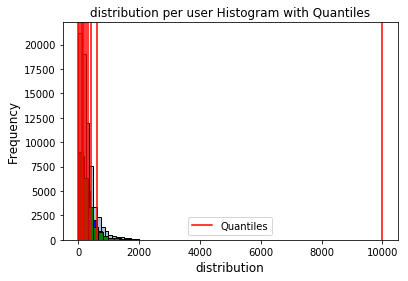

In [52]:
x_train_price,x_cv_price,x_test_price = bin_data(s_train = x_train['price'],\
                                                 s_cv = x_cv['price'],s_test=x_test['price'])



In [53]:
x_train_price.astype(str).unique()

array(['(617.92, 9999.0]', '(428.32, 617.92]', '(267.0, 335.69]',
       '(124.02, 164.46]', '(0.689, 38.99]', '(84.57, 124.02]',
       '(206.36, 267.0]', '(164.46, 206.36]', '(335.69, 428.32]',
       '(38.99, 84.57]'], dtype=object)

In [54]:
x_train_price,x_cv_price,x_test_price,price_feat_names = one_hot_encoder(df_col_train=x_train_price.astype(str),\
                                                        df_col_cv=x_cv_price.astype(str),\
                                                        df_col_test=x_test_price.astype(str),vocab=x_train_price.astype(str).unique())


features are : 
 ['(617.92, 9999.0]', '(428.32, 617.92]', '(267.0, 335.69]', '(124.02, 164.46]', '(0.689, 38.99]', '(84.57, 124.02]', '(206.36, 267.0]', '(164.46, 206.36]', '(335.69, 428.32]', '(38.99, 84.57]']


0.0      0.0
0.1      0.0
0.2      0.0
0.3      1.0
0.4      1.0
0.5      2.0
0.6      4.0
0.7      7.0
0.8     12.0
0.9     28.0
1.0    451.0
Name: teacher_number_of_previously_posted_projects, dtype: float64


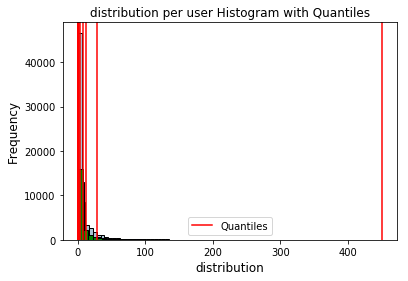

In [55]:
x_train_pp_count,x_cv_pp_count,x_test_pp_count = bin_data(s_train = x_train['teacher_number_of_previously_posted_projects'],\
                                                         s_cv = x_cv['teacher_number_of_previously_posted_projects'],\
                                                         s_test = x_test['teacher_number_of_previously_posted_projects'],\
                                                         )

In [56]:
x_train_pp_count.astype(str).unique()

array(['(-0.001, 1.0]', '(12.0, 28.0]', '(2.0, 4.0]', '(28.0, 451.0]',
       '(7.0, 12.0]', '(4.0, 7.0]', '(1.0, 2.0]'], dtype=object)

In [57]:
x_train_pp_count,x_cv_pp_count,x_test_pp_count,pp_feat_names = one_hot_encoder(df_col_train=x_train_pp_count.astype(str),\
                                                                df_col_cv=x_cv_pp_count.astype(str),\
                                                                df_col_test=x_test_pp_count.astype(str),\
                                                                vocab=x_train_pp_count.astype(str).unique())

features are : 
 ['(-0.001, 1.0]', '(12.0, 28.0]', '(2.0, 4.0]', '(28.0, 451.0]', '(7.0, 12.0]', '(4.0, 7.0]', '(1.0, 2.0]']


In [58]:
# printing the dimensions of vectorized of dataset
print_dimension_info(_obj=[x_train_tp,x_cv_tp,x_test_tp],_name='Teacher Prefix')
print_dimension_info(_obj=[x_train_ss,x_cv_ss,x_test_ss],_name='Schol State Column')
print_dimension_info(_obj=[x_train_pgc,x_cv_pgc,x_test_pgc],_name = 'Project Grade Category')
print_dimension_info(_obj=[x_train_cat,x_cv_cat,x_test_cat],_name= 'Project subject category')
print_dimension_info(_obj=[x_train_sub,x_cv_sub,x_test_sub],_name= 'Project subject sub category')
print_dimension_info(_obj=[x_train_price,x_cv_price,x_test_price],_name = 'Price')
print_dimension_info(_obj=[x_train_pp_count,x_cv_pp_count,x_test_pp_count],_name='Count of previous project submitted by teacher')


The Values for :  Teacher Prefix

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 5), ('Cross Validation count : ', 5), ('Test count : ', 5)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************
The Values for :  Schol State Column

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 51), ('Cross Validation count : ', 51), ('Test count : ', 51)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************
The Values 

In [59]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we can concatenate a sparse matrix and a dense matirx :)
x_train_vec = hstack((x_train_tp, x_train_ss, x_train_pgc, x_train_cat, x_train_sub, x_train_price, x_train_pp_count),format='csr')
x_cv_vec = hstack((x_cv_tp, x_cv_ss, x_cv_pgc, x_cv_cat, x_cv_sub, x_cv_price, x_cv_pp_count),format='csr')
x_test_vec = hstack((x_test_tp, x_test_ss, x_test_pgc, x_test_cat, x_test_sub, x_test_price, x_test_pp_count),format='csr')

print_dimension_info(_obj=[x_train_vec,x_cv_vec,x_test_vec],_name='Stacked sparse matrices dimensions')



The Values for :  Stacked sparse matrices dimensions

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 116), ('Cross Validation count : ', 116), ('Test count : ', 116)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [61]:
# Bag of words vectorization for train,cv and test data
bow_title_train,bow_title_cv,bow_title_test,bow_title_features = vectorize_text(encoding_type='BOW',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )

print_dimension_info(_obj=[bow_title_train,bow_title_cv,bow_title_test],_name='Dimensions after BOW on Title :')

bow_essay_train,bow_essay_cv,bow_essay_test,bow_essay_features = vectorize_text(encoding_type='BOW',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )
print_dimension_info(_obj=[bow_essay_train,bow_essay_cv,bow_essay_test],_name='Dimensions after BOW on essay')


The Values for :  Dimensions after BOW on Title :

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 2479), ('Cross Validation count : ', 2479), ('Test count : ', 2479)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************
The Values for :  Dimensions after BOW on essay

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 3000), ('Cross Validation count : ', 3000), ('Test count : ', 3000)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
*********************************************************************

In [62]:
# Stacking all the BOW models with existing data frame - 

final_x_train = hstack((x_train_vec,bow_title_train,bow_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,bow_title_cv,bow_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,bow_title_test,bow_essay_test),format='csr')

# stacking all their features also so that we can interpret the features importance here.
stacked_feature_list = [tp_feat_names,ss_feat_names,pgc_feat_names,cat_feat_names,sub_feat_names,\
                ['price range '+x for x in price_feat_names],['pp count '+x for x in pp_feat_names] ]
feature_list = list()
for features in stacked_feature_list:
    feature_list.extend(features)
#print("All general features are: \n",feature_list)
# stacking for features for bow model
bow_feature_list = list()
bow_feature_list.extend(feature_list)
for features in [bow_title_features,bow_essay_features]:
    bow_feature_list.extend(features)

print_dimension_info(_obj=[final_x_train,final_x_cv,final_x_test],_name='The Final Matrix dimension info after BOW')

The Values for :  The Final Matrix dimension info after BOW

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 5595), ('Cross Validation count : ', 5595), ('Test count : ', 5595)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


<h2>2.4 Appling NB() on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Naive Bayes on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code. 

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying NB brute force on BOW,<font color='red'> SET 1</font>

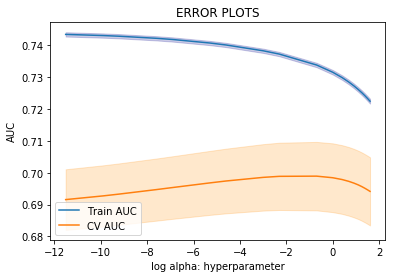

In [64]:
# cross validation with BOW model

#_hypertuning(x_train = final_x_train,y_train=y_train.values,x_cv=final_x_cv,y_cv=y_cv.values,tune_type='custom')

_hypertuning(x_train = final_x_train,y_train=y_train.values,tune_type='gridsearch')

In [65]:
# Deciding appropriate threshold with cross validation dataset
evaluate_threshold(_alpha=np.exp(-2.1),x_train = final_x_train,y_train=y_train.values,x_cv=final_x_cv,y_cv=y_cv.values)



+--------------------------+---------------------+---------------------+---------------------------+
| Sensitivity/Recall (TPR) | Specificity (1-FPR) |   Threshold Value   | Log Probability threshold |
+--------------------------+---------------------+---------------------+---------------------------+
|           1.0            |         0.0         |         0.0         |            -inf           |
|    0.8241758241758241    | 0.42727616169248206 | 0.05000000000000001 |     -2.995732273553991    |
|    0.7882424324142115    | 0.48469965999244424 | 0.10000000000000002 |    -2.3025850929940455    |
|    0.7609384480550124    |  0.5190782017378164 | 0.15000000000000002 |     -1.897119984885881    |
|    0.7411177779275939    |  0.5459010200226672 |         0.2         |    -1.6094379124341003    |
|    0.7260837322187016    |  0.5704571212693615 |         0.25        |    -1.3862943611198906    |
|    0.7115216072271286    |  0.5859463543634302 | 0.30000000000000004 |     -1.20397280432

In general, We will be choosing Threshold value as 0.55 (log threshold = -0.59) as it maximizes Sensitivity as well as Specificity. Also it's more inclined towards TPR values means relative less false negatives </br> Also it depends on the case where what we want to maximize either TPR (or minimise FN) or FPR (or maximize FP) </br>
For Alpha we will be taking values around log threshold -2.1. As post this value there is not much growth in cross validation AUC score but Training set AUC will decrease drastically.

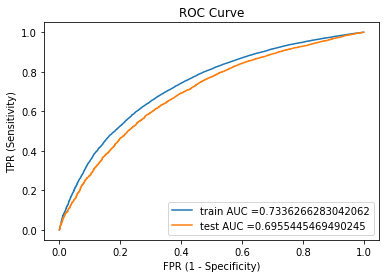

Negative Class Important Features 
 ['finally' 'chaos' 'tiger' 'ages' 'tie' 'secure' 'parts' 'ti' 'seventh'
 'throw']
****************************************************************************************************
Positive Class Important Features 
 ['price range (617.92, 9999.0]' 'price range (428.32, 617.92]'
 'Grades 3-5' 'Grades 6-8' 'Grades 9-12' 'Grades PreK-2'
 'pp count (1.0, 2.0]' 'pp count (7.0, 12.0]' 'pp count (28.0, 451.0]'
 'pp count (2.0, 4.0]']
Confusion matrix 



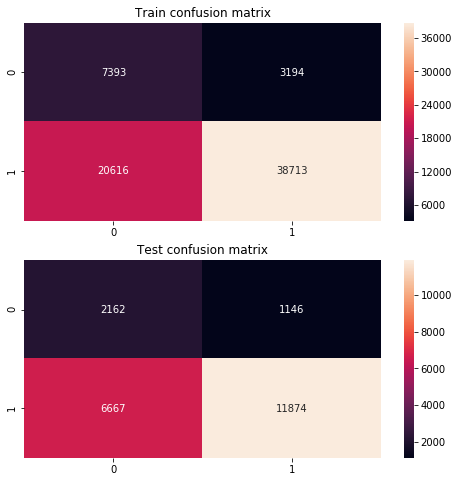

In [66]:
# Checking the auc score with proper K value
bow_aplha = np.exp(-2.1)
bow_train_auc,bow_test_auc = model_gen_score(x_train = final_x_train,y_train=y_train.values,\
                                             x_test=final_x_test,y_test=y_test.values,best_alpha=bow_aplha,\
                                            cutoff_val= -0.5978370007556204,features_names=bow_feature_list)
                                             

### 2.4.2 Applying NB brute force on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation

tfidf_essay_train,tfidf_essay_cv,tfidf_essay_test,tfidf_essay_features = vectorize_text(encoding_type='TFIDF',train_text = x_train['essay'],\
                                                             cv_text =x_cv['essay'] , test_text =x_test['essay'] )

In [0]:
# Please write all the code with proper documentation

tfidf_title_train,tfidf_title_cv,tfidf_title_test,tfidf_title_features = vectorize_text(encoding_type='TFIDF',train_text = x_train['title'],\
                                                             cv_text =x_cv['title'] , test_text =x_test['title'] )

In [69]:
final_x_train = hstack((x_train_vec,tfidf_title_train,tfidf_essay_train),format='csr')
final_x_cv = hstack((x_cv_vec,tfidf_title_cv,tfidf_essay_cv),format='csr')
final_x_test = hstack((x_test_vec,tfidf_title_test,tfidf_essay_test),format='csr')

tfidf_feature_list = list()
tfidf_feature_list.extend(feature_list)
#print('tfidf features ', tfidf_feature_list)
for features in [tfidf_title_features,tfidf_essay_features]:
    tfidf_feature_list.extend(features)

print_dimension_info(_obj=[final_x_train,final_x_cv,final_x_test],_name='The Final Matrix dimension info after TFIDF')

The Values for :  The Final Matrix dimension info after TFIDF

Row Values are :  [('Training count : ', 69916), ('Cross Validation count : ', 17480), ('Test count : ', 21849)]

Column Values are :  [('Training count : ', 5595), ('Cross Validation count : ', 5595), ('Test count : ', 5595)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************


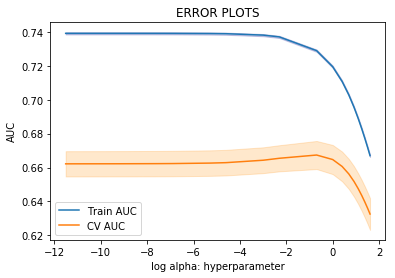

In [70]:
# Hypertuning the parameters for cross validation

_hypertuning(x_train = final_x_train,y_train=y_train.values,tune_type='gridsearch')


In [71]:
# Deciding appropriate threshold with cross validation dataset
evaluate_threshold(_alpha=np.exp(-0.8),x_train = final_x_train,y_train=y_train.values,x_cv=final_x_cv,y_cv=y_cv.values)


+--------------------------+----------------------+---------------------+---------------------------+
| Sensitivity/Recall (TPR) | Specificity (1-FPR)  |   Threshold Value   | Log Probability threshold |
+--------------------------+----------------------+---------------------+---------------------------+
|           1.0            |         0.0          |         0.0         |            -inf           |
|    0.9999325827546687    |         0.0          | 0.05000000000000001 |     -2.995732273553991    |
|    0.997707813658734     | 0.007933509633547442 | 0.10000000000000002 |    -2.3025850929940455    |
|    0.9877974785950246    |  0.0374008311295807  | 0.15000000000000002 |     -1.897119984885881    |
|    0.9676397222409492    | 0.09520211560256897  |         0.2         |    -1.6094379124341003    |
|    0.9327175891593069    | 0.17302606724593883  |         0.25        |    -1.3862943611198906    |
|    0.8890312141845884    |  0.2591613146958821  | 0.30000000000000004 |     -1.2

There is certain spikes between -1 and 0 values. In general, We will be choosing Threshold value as 0.5 (log threshold = -0.69) as it maximizes Sensitivity as well as Specificity. Also it's more inclined towards TPR values means relative less false negatives </br> Also it depends on the case where what we want to maximize either TPR (or minimise FN) or FPR (or maximize FP) </br>
For Alpha we will be taking values around log threshold -0.8. As post this value there is not much growth in cross validation AUC score but Training set AUC will decrease drastically.

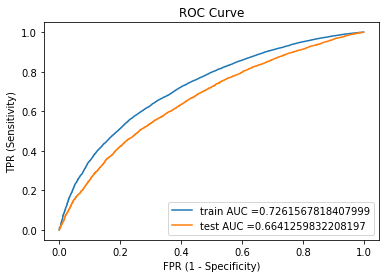

Negative Class Important Features 
 ['headphone' 'literate' '123' 'priceless' 'rekenreks' '180' 'ice' 'pellet'
 'preserving' 'chaos']
****************************************************************************************************
Positive Class Important Features 
 ['price range (206.36, 267.0]' 'pp count (28.0, 451.0]'
 'pp count (2.0, 4.0]' 'pp count (12.0, 28.0]'
 'price range (38.99, 84.57]' 'price range (335.69, 428.32]'
 'price range (164.46, 206.36]' 'price range (84.57, 124.02]'
 'price range (0.689, 38.99]' 'price range (124.02, 164.46]']
Confusion matrix 



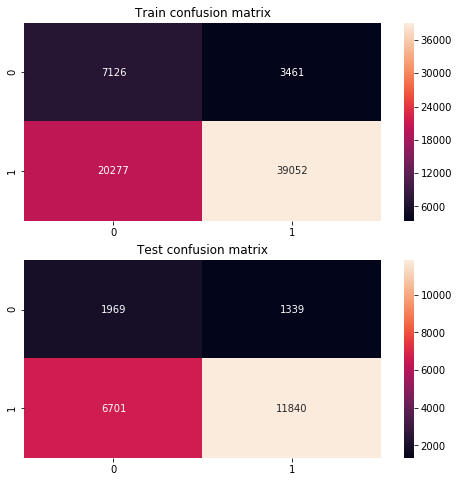

In [72]:
# Testing the data on Test data to check generalization of this Model
tfidf_alpha = np.exp(-0.8)
tfidf_train_auc,tfidf_test_auc = model_gen_score(x_train = final_x_train,y_train = y_train.values,x_test = final_x_test,y_test = y_test.values,best_alpha = tfidf_alpha,cutoff_val = -0.69,features_names = tfidf_feature_list)
                                                 

The train AUC i.e. 72% and Test AUC i.e. 66% is almost closer but BOW model was generalizing well as compared to TFIDF models. </br> 
Also The false negatives are relatively lesser as compared to other values(FP,TN,TP)

<h1>3. Conclusions</h1>

In [73]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ['Vectorizer','Model','Hyperparameters','TEST AUC']

x.add_row(['BOW','BRUTE',bow_aplha,bow_test_auc])
x.add_row(['TFIDF','BRUTE',tfidf_alpha,tfidf_test_auc])

print(x)


+------------+-------+---------------------+--------------------+
| Vectorizer | Model |   Hyperparameters   |      TEST AUC      |
+------------+-------+---------------------+--------------------+
|    BOW     | BRUTE |  0.1224564282529819 | 0.6955445469490245 |
|   TFIDF    | BRUTE | 0.44932896411722156 | 0.6641259832208197 |
+------------+-------+---------------------+--------------------+


* The BOW model has better generalized with the AUC of 69% while TFIDF model (AUC 66%). </br>
* Since, Real valued random variables in this dataset were following pareto Distribution, instead of Gaussian distribution. So, We have binned the Continuos variable data to use multinomial NB directly on the whole dataset so that we do hyper parameter tuning on whole dataset.
* Also binning can remove the noise from data. 